<img src="https://brand.umich.edu/assets/brand/style-guide/logo-guidelines/U-M_Logo-Horizontal-Hex.png" alt="Drawing" style="width: 300px;" align="left"/><br>
    
## Week 2: Building prediction models of student success (20pts)

Building prediction models of student success is one of the most prominent application of data science in education. Early detection of at-risk students will help the universities design in-time interventions and provide targeted support to those who were struggling. We will use the same OULAD dataset that you have worked on in week 1.

**Overview of the dataset**

The dataset contains the information about 22 courses, 32,593 students, their assessment results, and logs of their interactions with the Virtual Learning Environment (e.g., Moodle) represented by daily summaries of student clicks (10,655,280 entries). 

**Reference**

Kuzilek, J., Hlosta, M., & Zdrahal, Z. (2017). Open university learning analytics dataset. Scientific data, 4, 170171. https://www.nature.com/articles/sdata2017171

# Open University Learning Analytics (OULAD) dataset

Kuzilek, J., Hlosta, M., & Zdrahal, Z. (2017). Open university learning analytics dataset. Scientific data, 4, 170171. https://www.nature.com/articles/sdata2017171
## Data scheme
![](https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fsdata.2017.171/MediaObjects/41597_2017_Article_BFsdata2017171_Fig2_HTML.jpg)
## Course timeline
![](https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fsdata.2017.171/MediaObjects/41597_2017_Article_BFsdata2017171_Fig1_HTML.jpg)
## Relational database
* A module is a course
* A presentation is a semester (e.g., 2019J - Fall 2019, 2019B = Winter 2019)
* vle = virtual learning enviroment
![](https://analyse.kmi.open.ac.uk/resources/images/model.png)

---

## We only use data of BBB and FFF in 2013J and 2014J in this week assignment

## A. Prepare the data (2pts)

Load the data 'assets/studentInfo.csv'   
Write a function that returns a pd.DataFrame of shape (6254, 39)

* Create a new column ['outcome'], where outcome == 1 if students achieve a pass or a distinction, outcome == 0 if students failed
* One-Hot Encode categorical features. Use dummies for multi-class features.
* Do not encode ['id_student','code_module','code_presentation']
* Make sure you only use data from BBB and FFF in 2013J and 2014J

The final dataframe should consist of the following columns:

 'code_module',  
 'code_presentation',  
 'id_student',  
 'num_of_prev_attempts',  
 'studied_credits',  
 'outcome',    
 'gender_F',  
 'region_East Anglian Region',  
 'region_East Midlands Region',  
 'region_Ireland',  
 'region_London Region',  
 'region_North Region',  
 'region_North Western Region',  
 'region_Scotland',  
 'region_South East Region',  
 'region_South Region',  
 'region_South West Region',  
 'region_Wales',  
 'region_West Midlands Region',  
 'region_Yorkshire Region',  
 'highest_education_A Level or Equivalent',  
 'highest_education_HE Qualification',  
 'highest_education_Lower Than A Level',  
 'highest_education_No Formal quals',  
 'highest_education_Post Graduate Qualification',  
 'imd_band_0-10%',  
 'imd_band_10-20',  
 'imd_band_20-30%',  
 'imd_band_30-40%',  
 'imd_band_40-50%',  
 'imd_band_50-60%',  
 'imd_band_60-70%',  
 'imd_band_70-80%',  
 'imd_band_80-90%',  
 'imd_band_90-100%',  
 'age_band_0-35',  
 'age_band_35-55',  
 'age_band_55<=',  
 'disability_Y'  
  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def answer_a():
    
    ### BEGIN SOLUTION
    
    # Import data
    stdinfo = pd.read_csv("assets/studentInfo.csv")
    
    # Remove students who withdraw
    stdinfo = stdinfo.loc[stdinfo['final_result'] != 'Withdrawn']
    
    # Filter modules 'BBB' and 'FFF'
    stdinfo = stdinfo.loc[(stdinfo['code_module'] == 'BBB') | (stdinfo['code_module'] == 'FFF')]
    
    # Filter semester '2013J' and '2014J'
    stdinfo = stdinfo.loc[(stdinfo['code_presentation'] == '2013J') | (stdinfo['code_presentation'] == '2014J')]
    
    
    # Set index
    stdinfo.set_index(['id_student','code_module','code_presentation'], inplace=True)
    
    # Create binary outcome target column
    stdinfo['outcome'] = 0
    stdinfo.loc[(stdinfo['final_result']== 'Pass') | 
            (stdinfo['final_result']== 'Distinction'), 'outcome'] = 1
    
    # Drop final_result
    stdinfo = stdinfo.drop(labels=['final_result'], axis=1)
    
    # Encode dummies
    stdinfo = pd.get_dummies(stdinfo)
    
    # Return result
    result = stdinfo.drop(labels=['disability_N',
                               'gender_M'], axis=1).reset_index()
    ### END SOLUTION
    
    return result

In [3]:
# Cell for autograder

# Check data frame shape 
assert answer_a().shape == (6254, 39), "Your pandas data frame should have 39 columns and 6254 rows"

### BEGIN HIDDEN TESTS
from pandas.testing import assert_frame_equal

def solution_a():
    
    # Import data
    stdinfo = pd.read_csv("assets/studentInfo.csv")
    
    # Remove students who withdraw
    stdinfo = stdinfo.loc[stdinfo['final_result'] != 'Withdrawn']
    
    # Filter modules 'BBB' and 'FFF'
    stdinfo = stdinfo.loc[(stdinfo['code_module'] == 'BBB') | (stdinfo['code_module'] == 'FFF')]
    
    # Filter semester '2013J' and '2014J'
    stdinfo = stdinfo.loc[(stdinfo['code_presentation'] == '2013J') | (stdinfo['code_presentation'] == '2014J')]
    
    # Set index
    stdinfo.set_index(['id_student','code_module','code_presentation'], inplace=True)
    
    # Create binary outcome target column
    stdinfo['outcome'] = 0
    stdinfo.loc[(stdinfo['final_result']== 'Pass') | 
            (stdinfo['final_result']== 'Distinction'), 'outcome'] = 1
    
    # Drop final_result
    stdinfo = stdinfo.drop(labels=['final_result'], axis=1)
    
    # Encode dummies
    stdinfo = pd.get_dummies(stdinfo)
    
    # Return result
    result = stdinfo.drop(labels=['disability_N',
                               'gender_M'], axis=1).reset_index()
      
    return result

# Assert answer_a() vs solotion_a()
assert_frame_equal(answer_a(), solution_a(), check_dtype=False, check_names=False,check_like=True)

### END HIDDEN TESTS

## B. Feature engineering: assessments (3pts)

For each unique combination of ['code_module','code_presentation','id_student'], create 3 new features: TMA1, TMA2, TMA3.
* TMA1 is the the weighted score of 1st TMA rank by date 
* TMA2 is the the weighted score of 2nd TMA rank by date
* TMA3 is the the weighted score of 3rd TMA rank by date 

Note:
* Weighted_score = weight * score /100
* If the students did not submit their TMA, then their score == 0. However, since those who did not submit TMA was not recorded in the studentAssessment.csv, you would need to think of a clever way to capture that information. Hint: You can use studentInfo.csv as a reference point. 
* Make sure you only use data from BBB and FFF in 2013J and 2014J

The final dataframe should have a shape of (6254, 6) and it should consists of the following columns:
* 'code_module' 
* 'code_presentation'
* 'id_student'
* 'TMA1'
* 'TMA2'
* 'TMA3'

In [4]:
def answer_b():
    
    ### BEGIN SOLUTION
    # Import data
    assessments = pd.read_csv('assets/assessments.csv')
    stdgrade  = pd.read_csv('assets/studentAssessment.csv')
    stdinfo = pd.read_csv("assets/studentInfo.csv")
    
    # Select the first three TMAs
    assessments = assessments.loc[assessments['assessment_type']=='TMA']
    assessments=assessments.sort_values(by=['code_module','code_presentation','date']).groupby(['code_module','code_presentation']).nth([0,1,2]).reset_index()
    
    # Filter out withdrawn students
    stdinfo = stdinfo.loc[stdinfo['final_result'] != 'Withdrawn']
    
    # Filter modules 'BBB' and 'FFF'
    stdinfo = stdinfo.loc[(stdinfo['code_module'] == 'BBB') | (stdinfo['code_module'] == 'FFF')]
    
    # Filter semester '2013J' and '2014J'
    stdinfo = stdinfo.loc[(stdinfo['code_presentation'] == '2013J') | (stdinfo['code_presentation'] == '2014J')]
    
    # Keep unique combination of 'id_student','code_module','code_presentation'
    stdinfo = stdinfo[['id_student','code_module','code_presentation']].drop_duplicates()
    
    # Merge stdinfo with assessment
    stdgrade_assess = pd.merge(assessments,stdinfo,on=['code_module','code_presentation'],how='inner').sort_values(by='id_student')
    
    # Merge with stdgrade
    stdgrade_assess = pd.merge(stdgrade_assess,stdgrade,on=['id_student','id_assessment'],how='left')
    
    # Calculate weighted score
    stdgrade_assess['weighted_score'] = (stdgrade_assess['score'] * stdgrade_assess['weight'])/100
    stdgrade_assess= stdgrade_assess[['code_module','code_presentation','id_student','assessment_type','date','weighted_score']]
    
    # Create rank of TMA by date 
    stdgrade_assess['TMA_rank']=stdgrade_assess.groupby(['code_module','code_presentation','id_student'])['date'].rank(ascending=True, method='dense').astype(int)
    
    # Combine string to create numbered TMAs
    stdgrade_assess['TMA_rank'] = stdgrade_assess['assessment_type']+stdgrade_assess['TMA_rank'].astype(str)
    
    # Keep cols
    stdgrade_assess=stdgrade_assess[['code_module','code_presentation','id_student','TMA_rank','weighted_score']]
    
    # Replace missing score as 0
    stdgrade_assess['weighted_score'] = stdgrade_assess['weighted_score'].fillna(0)
    
    # Long to wide
    stdgrade_assess= stdgrade_assess.pivot_table(
            index=['code_module','code_presentation','id_student'], 
             columns='TMA_rank', 
             values='weighted_score'
            )
    
    # Clear indexes
    stdgrade_assess= stdgrade_assess.reset_index().sort_values(by=['id_student','code_module','code_presentation'])
    stdgrade_assess= stdgrade_assess.rename_axis(None, axis=1).reset_index(drop=True)
    
    result = stdgrade_assess
    ### END SOLUTION
    
    return result

In [5]:
# Cell for autograder

# Data frame shape 
assert answer_b().shape == (6254, 6), "Your data frame should have 6 columns and 6254 rows"

# Missing scores as 0
assert answer_b()['TMA1'].isnull().sum() < 1, "If the students did not submit their TMA, then their weighted score == 0"
assert answer_b()['TMA2'].isnull().sum() < 1, "If the students did not submit their TMA, then their weighted score == 0"
assert answer_b()['TMA3'].isnull().sum() < 1, "If the students did not submit their TMA, then their weighted score == 0"

### BEGIN HIDDEN TESTS
from pandas.testing import assert_frame_equal
def solution_b():
    
    # Import data
    assessments = pd.read_csv('assets/assessments.csv')
    stdgrade  = pd.read_csv('assets/studentAssessment.csv')
    stdinfo = pd.read_csv("assets/studentInfo.csv")
    
    # Select the first three TMAs
    assessments = assessments.loc[assessments['assessment_type']=='TMA']
    assessments=assessments.sort_values(by=['code_module','code_presentation','date']).groupby(['code_module','code_presentation']).nth([0,1,2]).reset_index()
    
    # Filter out withdrawn students
    stdinfo = stdinfo.loc[stdinfo['final_result'] != 'Withdrawn']
    
    # Filter modules 'BBB' and 'FFF'
    stdinfo = stdinfo.loc[(stdinfo['code_module'] == 'BBB') | (stdinfo['code_module'] == 'FFF')]
    
    # Filter semester '2013J' and '2014J'
    stdinfo = stdinfo.loc[(stdinfo['code_presentation'] == '2013J') | (stdinfo['code_presentation'] == '2014J')]
    
    # Keep unique combination of 'id_student','code_module','code_presentation'
    stdinfo = stdinfo[['id_student','code_module','code_presentation']].drop_duplicates()
    
    # Merge stdinfo with assessment
    stdgrade_assess = pd.merge(assessments,stdinfo,on=['code_module','code_presentation'],how='inner').sort_values(by='id_student')
    
    # Merge with stdgrade
    stdgrade_assess = pd.merge(stdgrade_assess,stdgrade,on=['id_student','id_assessment'],how='left')
    
    # Calculate weighted score
    stdgrade_assess['weighted_score'] = (stdgrade_assess['score'] * stdgrade_assess['weight'])/100
    stdgrade_assess= stdgrade_assess[['code_module','code_presentation','id_student','assessment_type','date','weighted_score']]
    
    # Create rank of TMA by date 
    stdgrade_assess['TMA_rank']=stdgrade_assess.groupby(['code_module','code_presentation','id_student'])['date'].rank(ascending=True, method='dense').astype(int)
    
    # Combine string to create numbered TMAs
    stdgrade_assess['TMA_rank'] = stdgrade_assess['assessment_type']+stdgrade_assess['TMA_rank'].astype(str)
    
    # Keep cols
    stdgrade_assess=stdgrade_assess[['code_module','code_presentation','id_student','TMA_rank','weighted_score']]
    
    # Replace missing score as 0
    stdgrade_assess['weighted_score'] = stdgrade_assess['weighted_score'].fillna(0)
    
    # Long to wide
    stdgrade_assess= stdgrade_assess.pivot_table(
            index=['code_module','code_presentation','id_student'], 
             columns='TMA_rank', 
             values='weighted_score'
            )
    
    # Clear indexes
    stdgrade_assess= stdgrade_assess.reset_index().sort_values(by=['id_student','code_module','code_presentation'])
    stdgrade_assess= stdgrade_assess.rename_axis(None, axis=1).reset_index(drop=True)
    
    result = stdgrade_assess
      
    return result

assert_frame_equal(answer_b(), solution_b(), check_dtype=False, check_names=False,check_like=True)

### END HIDDEN TESTS

---

## C. Feature engineering: VLE activities (3pts)

Write a function that summarizes the number of clicks on each course section during day [0,100] for each student. It should returns a pd.dataframe with the shape of (6254,7) with the following columns:
* 'code_module'
* 'code_presentation'
* 'id_student'

And compute the sum of click for:
* 'forumng'
* 'homepage'
* 'oucontent'
* 'resource'
* 'glossary'
* 'oucollaborate'
* 'quiz'
* 'subpage'
* 'url'

**Note**: 
* Missing data should be replaced by 0, which means that the students did not click on that course section
* Make sure you only use data from BBB and FFF in 2013J and 2014J

In [6]:
def answer_c():
    
    ### BEGIN SOLUTION
    # Import data
    stdinfo = pd.read_csv("assets/studentInfo.csv")
    vle = pd.read_csv('assets/vle.csv')
    
    from dask import dataframe as dd
    stdvle = dd.read_csv('assets/studentVle.csv',dtype={'code_module': 'object',
                                                        'code_presentation': 'object',
                                                        'id_student': 'int', 
                                                        'id_site': 'float64',
                                                        'date': 'float64',
                                                        'sum_click': 'float64'}).compute(scheduler='threads')
    
    # Filter activity type
    vle = vle.loc[vle['activity_type'].isin(['forumng','homepage','oucontent','resource',
                                            'glossary','oucollaborate','quiz','subpage','url'])]
    vle = vle[['id_site','code_module','code_presentation','activity_type']]
    
    # Filter date range
    stdvle = stdvle.loc[(stdvle['date'] <= 100)&
                        (stdvle['date'] >= 0)]
    
    # Remove withdrawn students
    stdinfo = stdinfo.loc[stdinfo['final_result'] != 'Withdrawn']
    
    # Filter modules 'BBB' and 'FFF'
    stdinfo = stdinfo.loc[(stdinfo['code_module'] == 'BBB') | (stdinfo['code_module'] == 'FFF')]
    
    # Filter semester '2013J' and '2014J'
    stdinfo = stdinfo.loc[(stdinfo['code_presentation'] == '2013J') | (stdinfo['code_presentation'] == '2014J')]
    
    # Unique combination of 'id_student','code_module','code_presentation'
    stdinfo = stdinfo[['id_student','code_module','code_presentation']].drop_duplicates()
    
    # Merge stdvle with stdinfo
    stdvle = pd.merge(stdvle,stdinfo,how='right',on=['id_student','code_module','code_presentation'])
    
    # Merge stdvld with vle
    stdvle = pd.merge(stdvle,vle,how='inner',on=['id_site','code_module','code_presentation'])
    
    # Aggregate sum group by each activity type per student
    stdvle = stdvle.groupby(['code_module','code_presentation','id_student','activity_type'])['sum_click'].sum().reset_index()
    
    
    vle = vle[['code_module','code_presentation','activity_type']].drop_duplicates()
    
    # Merge stdinfo with vle to create all possible combination
    stdvle2 = pd.merge(stdinfo,vle,how='inner',on=['code_module','code_presentation'])
    
    # Merge stdvle with stdvle2
    stdvle2 = pd.merge(stdvle,stdvle2,how='right',on=['id_student','code_module','code_presentation','activity_type'])
    
    # Replace missing data with 0
    stdvle2['sum_click'] = stdvle2['sum_click'].fillna(0)
    
    # Long to wide
    stdvle2 = stdvle2.pivot_table(
                index=['code_module','code_presentation','id_student'], 
                 columns='activity_type', 
                 values='sum_click'
                )
    # Clear indexes
    stdvle2= stdvle2.reset_index().sort_values(by=['id_student','code_module','code_presentation'])
    stdvle2= stdvle2.rename_axis(None, axis=1).reset_index(drop=True)
    
    result = stdvle2
    ### END SOLUTION

    return result

In [7]:
# Cell for autograder
ans_c = answer_c()

# Data frame shape 
assert ans_c.shape == (6254, 12), "Your data frame should have 7 columns and 6254 rows"

### BEGIN HIDDEN TESTS
from pandas.testing import assert_frame_equal
def solution_c():
    
    # Import data
    stdinfo = pd.read_csv("assets/studentInfo.csv")
    vle = pd.read_csv('assets/vle.csv')
    
    from dask import dataframe as dd
    stdvle = dd.read_csv('assets/studentVle.csv',dtype={'code_module': 'object',
                                                        'code_presentation': 'object',
                                                        'id_student': 'int', 
                                                        'id_site': 'float64',
                                                        'date': 'float64',
                                                        'sum_click': 'float64'}).compute(scheduler='threads')
    
    # Filter activity type
    vle = vle.loc[vle['activity_type'].isin(['forumng','homepage','oucontent','resource',
                                            'glossary','oucollaborate','quiz','subpage','url'])]
    vle = vle[['id_site','code_module','code_presentation','activity_type']]
    
    # Filter date range
    stdvle = stdvle.loc[(stdvle['date'] <= 100)&
                        (stdvle['date'] >= 0)]
    
    # Remove withdrawn students
    stdinfo = stdinfo.loc[stdinfo['final_result'] != 'Withdrawn']
    
    # Filter modules 'BBB' and 'FFF'
    stdinfo = stdinfo.loc[(stdinfo['code_module'] == 'BBB') | (stdinfo['code_module'] == 'FFF')]
    
    # Filter semester '2013J' and '2014J'
    stdinfo = stdinfo.loc[(stdinfo['code_presentation'] == '2013J') | (stdinfo['code_presentation'] == '2014J')]
    
    # Unique combination of 'id_student','code_module','code_presentation'
    stdinfo = stdinfo[['id_student','code_module','code_presentation']].drop_duplicates()
    
    # Merge stdvle with stdinfo
    stdvle = pd.merge(stdvle,stdinfo,how='right',on=['id_student','code_module','code_presentation'])
    
    # Merge stdvld with vle
    stdvle = pd.merge(stdvle,vle,how='inner',on=['id_site','code_module','code_presentation'])
    
    # Aggregate sum group by each activity type per student
    stdvle = stdvle.groupby(['code_module','code_presentation','id_student','activity_type'])['sum_click'].sum().reset_index()
    
    
    vle = vle[['code_module','code_presentation','activity_type']].drop_duplicates()
    
    # Merge stdinfo with vle to create all possible combination
    stdvle2 = pd.merge(stdinfo,vle,how='inner',on=['code_module','code_presentation'])
    
    # Merge stdvle with stdvle2
    stdvle2 = pd.merge(stdvle,stdvle2,how='right',on=['id_student','code_module','code_presentation','activity_type'])
    
    # Replace missing data with 0
    stdvle2['sum_click'] = stdvle2['sum_click'].fillna(0)
    
    # Long to wide
    stdvle2 = stdvle2.pivot_table(
                index=['code_module','code_presentation','id_student'], 
                 columns='activity_type', 
                 values='sum_click'
                )
    # Clear indexes
    stdvle2= stdvle2.reset_index().sort_values(by=['id_student','code_module','code_presentation'])
    stdvle2= stdvle2.rename_axis(None, axis=1).reset_index(drop=True)
    
    result = stdvle2
    
    return result

assert_frame_equal(ans_c, solution_c(), check_dtype=False, check_names=False,check_like=True)

### END HIDDEN TESTS

/opt/conda/lib/python3.7/site-packages/dask/dataframe/utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## D. Feature extraction: PCA (3pts)

Many of the features from VLE activities are highly correlated (e.g. if students click on homepage, they will be likely to click on oucontent). One way to reduce the number of highly correlated features is to perform a Principal Component Analysis (PCA).

Write a function
* Perform a PCA on the four VLE features in answer_c(): forumng, homepage, oucontent, resource. Make sure to standardize the features before run the PCA.
* Select the number of k components such that the **cummulative variance explained ratio > 0.8**
* Return a pd.dataframe that consist of: 'code_module','code_presentation','id_student', and the principal components that you chose. For example, if you choose k=2 then the columns should be PC1, PC2. If you choose k=3, then the columns should be PC1,PC2,PC3

In [8]:
def answer_d():
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    df = answer_c()
    
    ### BEGIN SOLUTION
    x = df.set_index(['code_module','code_presentation','id_student'])
    
    # Feature scaling
    x = StandardScaler().fit_transform(x)
    
    # Choose k in PCA
    pca = PCA(n_components=5)
    
    # Fit PCA
    principalComponents = pca.fit_transform(x)
    
    # Return as df
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['PC1', 'PC2', 'PC3','PC4','PC5'])
    result = pd.concat([df[['code_module','code_presentation','id_student']],principalDf], axis = 1)
    ### END SOLUTION

    return result

In [9]:
# Cell for autograder

### BEGIN HIDDEN TESTS
from pandas.testing import assert_frame_equal
def solution_d():
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    df = answer_c()
    
    x = df.set_index(['code_module','code_presentation','id_student'])
    
    # Feature scaling
    x = StandardScaler().fit_transform(x)
    
    # Choose k in PCA
    pca = PCA(n_components=5)
    
    # Fit PCA
    principalComponents = pca.fit_transform(x)
    
    # Return as df
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['PC1', 'PC2', 'PC3','PC4','PC5'])
    result = pd.concat([df[['code_module','code_presentation','id_student']],principalDf], axis = 1)
    return result

assert_frame_equal(answer_d(), solution_d(), check_dtype=False, check_names=False,check_like=True)

### END HIDDEN TESTS

### The subsequent questions will depend on the previous output. So make sure you submit the assignment at this point to ensure you got the right output before moving on

## E. Train-test split (3pts)

Write a function that
* Combine all the features from answer_a(), answer_b(), and answer_d() into a single dataframe
* Perform a feature scaling on the merged data using Standard Scaler
* Split the data into a traing set and a test set, make sure to use stratified sample because we have imbalanced data 
* Return X_train, X_test, y_train, y_test as np.arrays

Note: 
* Whenever appropriate, using a random_state =42
* 'code_module','code_presentation','id_student' should be excluded in the feature sets

In [10]:
def answer_e():
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    # Call data from the previous answers
    a = answer_a()
    b = answer_b()
    d = answer_d()
    
    ### BEGIN SOLUTION
    # Merge
    merge = pd.merge(a,b,on=['code_module','code_presentation','id_student'], how='inner')
    merge = pd.merge(merge,d,on=['code_module','code_presentation','id_student'], how='inner')
    merge

    # Extract feature columns and target column
    y = np.array(merge[['outcome']]).ravel()
    X = np.array(merge.drop(['outcome','code_module','code_presentation','id_student'], axis=1))
    
    # Standardizing features 
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    # Split train-test data usign stratified sampling
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

    ### END SOLUTION

    return X_train, X_test, y_train, y_test


In [11]:
# Cell for autograder
X_train, X_test, y_train, y_test = answer_e()

# Data length
assert X_train.shape == (4690, 43), "There should be 4690 data points and 40 features in the train set"
assert X_test.shape == (1564, 43), "There should be 1564 data points and 40 features in the test set"

# Feature normalization
assert (X_train < 200).all(), "You should perform a feature scaling after spliting the data"

### BEGIN HIDDEN TESTS
def solution_e():
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    # Call data from the previous answers
    a = answer_a()
    b = answer_b()
    d = answer_d()
    
    # Merge
    merge = pd.merge(a,b,on=['code_module','code_presentation','id_student'], how='inner')
    merge = pd.merge(merge,d,on=['code_module','code_presentation','id_student'], how='inner')
    merge

    # Extract feature columns and target column
    y = np.array(merge[['outcome']]).ravel()
    X = np.array(merge.drop(['outcome','code_module','code_presentation','id_student'], axis=1))

    # Standardizing features 
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    # Split train-test data usign stratified sampling
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
    
    return X_train, X_test, y_train, y_test

X_train_sol, X_test_sol, y_train_sol, y_test_sol = solution_e()


np.testing.assert_allclose(X_train, X_train_sol, err_msg = 'The values in X_train is not correct')
np.testing.assert_allclose(X_test, X_test_sol, err_msg = 'The values in X_test is not correct')
np.testing.assert_allclose(y_train, y_train_sol, err_msg = 'The values in y_train is not correct')
np.testing.assert_allclose(y_test, y_test_sol, err_msg = 'The values in y_test is not correct')


### END HIDDEN TESTS

## F. Apply classification algorithms (3pts)

Write a function that applies four different classification algorithms using the training and testing sets obtained from answer_e():
* Logistic Regression (random_state=42)
* Random Forest (random_state=42)
* Support Vector Machine (random_state=42)
* K-Nearest Neighbour (n_neighbors=5)

Return a pd.dataframe of shape (4,4) with the following columns ['Accuracy','Recall', 'Precision', 'Model']

**Resources**: You can find more details about the pros and cons of each alogrithm [here](https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222)

In [12]:
def answer_f():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    
    # Call data from the previous answers
    X_train, X_test, y_train, y_test = answer_e()
    
    ### BEGIN SOLUTION
   
    # Fit logistic regression
    lr = LogisticRegression(random_state=42)
    lr.fit(X_train, y_train)
    lr.test_preds = lr.predict(X_test)
    lr.metrics = [lr.score(X_test, y_test),
                 recall_score(y_test, lr.test_preds),
                 precision_score(y_test, lr.test_preds),
                  'Logistic Regression']

    # Fit random forest
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    rf.test_preds = rf.predict(X_test)
    rf.metrics = [rf.score(X_test, y_test),
                 recall_score(y_test, rf.test_preds),
                 precision_score(y_test, rf.test_preds),
                  'Random Forest']

    # Fit linear SVC
    svc = SVC(kernel='linear', random_state=42)
    svc.fit(X_train, y_train)
    svc.test_preds = svc.predict(X_test)
    svc.metrics = [svc.score(X_test, y_test),
                  recall_score(y_test, svc.test_preds),
                  precision_score(y_test, svc.test_preds), 
                   'Support Vector Machine']

    # Fit k-nearest neighbor
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    knn.test_preds = knn.predict(X_test)
    knn.metrics = [knn.score(X_test, y_test),
                  recall_score(y_test, knn.test_preds),
                  precision_score(y_test, knn.test_preds),
                   'K-Nearest Neighbour']

    result = pd.DataFrame(data=np.array([lr.metrics,rf.metrics,svc.metrics,knn.metrics])
                      , columns=['Accuracy','Recall', 'Precision', 'Model'])
    result['Accuracy'] = result['Accuracy'].astype(float)
    result['Precision'] = result['Precision'].astype(float)
    result['Recall'] = result['Recall'].astype(float)
    ### END SOLUTION

    return result


In [13]:
# Cell for autograder
ans_f = answer_f()

# Data frame shape 
assert ans_f.shape == (4,4), "Your data frame should 4 rows and 4 columns"

# Check accuracy of LR 
actual =  ans_f.loc[ans_f['Model']=='Logistic Regression']['Accuracy'].values 
desired = 0.862532
np.testing.assert_almost_equal(actual, desired, decimal=4, err_msg='The accuracy of Logistic Regression is not correct', verbose=True)

### BEGIN HIDDEN TESTS
from pandas.testing import assert_frame_equal
def solution_f():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    
    # Call data from the previous answers
    X_train, X_test, y_train, y_test = answer_e()
    

   
    # Fit logistic regression
    lr = LogisticRegression(random_state=42)
    lr.fit(X_train, y_train)
    lr.test_preds = lr.predict(X_test)
    lr.metrics = [lr.score(X_test, y_test),
                 recall_score(y_test, lr.test_preds),
                 precision_score(y_test, lr.test_preds),
                  'Logistic Regression']

    # Fit random forest
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    rf.test_preds = rf.predict(X_test)
    rf.metrics = [rf.score(X_test, y_test),
                 recall_score(y_test, rf.test_preds),
                 precision_score(y_test, rf.test_preds),
                  'Random Forest']

    # Fit linear SVC
    svc = SVC(kernel='linear', random_state=42)
    svc.fit(X_train, y_train)
    svc.test_preds = svc.predict(X_test)
    svc.metrics = [svc.score(X_test, y_test),
                  recall_score(y_test, svc.test_preds),
                  precision_score(y_test, svc.test_preds), 
                   'Support Vector Machine']

    # Fit k-nearest neighbor
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    knn.test_preds = knn.predict(X_test)
    knn.metrics = [knn.score(X_test, y_test),
                  recall_score(y_test, knn.test_preds),
                  precision_score(y_test, knn.test_preds),
                   'K-Nearest Neighbour']

    result = pd.DataFrame(data=np.array([lr.metrics,rf.metrics,svc.metrics,knn.metrics])
                      , columns=['Accuracy','Recall', 'Precision', 'Model'])
    result['Accuracy'] = result['Accuracy'].astype(float)
    result['Precision'] = result['Precision'].astype(float)
    result['Recall'] = result['Recall'].astype(float)


    return result

assert_frame_equal(ans_f, solution_f(), check_dtype=False, check_names=False,check_like=True)

### END HIDDEN TESTS

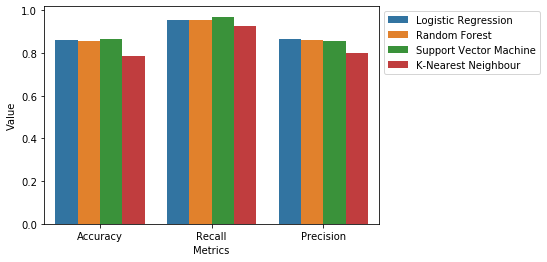

In [14]:
# Run to plot your result 
df=answer_f().melt('Model', var_name='Metrics', value_name='Value')
sns.barplot(x="Metrics", y="Value", hue="Model", data=df)
plt.legend(bbox_to_anchor=(1, 1), loc=2) 

## G. Model evaluation (3pts)

Write a function that applies 2 different classification algorithms using 10-fold [stratified cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html):

* Logistic regression
* Random forest

For each algorithm, return the mean roc_auc and standard deviation roc_auc
The final output should be a pd.DataFrame with the folliwng columns: 'mean_auc_score','std_auc_score','model'

Note: 
* While running the [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html), you can speed up the processing time by setting the number of jobs to run in parallel (e.g., n_jobs = 2) to make use of multi-core processing. See more in the documentation
* Make sure you use random_state=42 in setting up the StratifiedKFold, LogisticRegression, and RandomForestClassifier


In [15]:
def answer_g():
    
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    
    from sklearn.model_selection import StratifiedKFold
    from sklearn.model_selection import cross_val_score
    
    # Call data from the previous answers
    X_train, X_test, y_train, y_test = answer_e()
    X = np.concatenate((X_train,X_test), axis=0)
    y = np.concatenate((y_train,y_test), axis=0)

    ### BEGIN SOLUTION
    # Call data from the previous answers
    X_train, X_test, y_train, y_test = answer_e()
    X = np.concatenate((X_train,X_test), axis=0)
    y = np.concatenate((y_train,y_test), axis=0)

    # Set up cross validation
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Logistic regression
    lr = LogisticRegression(random_state=42)
    lr_cv = cross_val_score(lr, X, y, scoring="roc_auc", cv = cv, n_jobs=2)
    lr_mean_score = lr_cv.mean()
    lr_std_score = lr_cv.std()

    # Random forest
    rf = RandomForestClassifier(random_state=42)
    rf_cv = cross_val_score(rf, X, y, scoring="roc_auc", cv = cv, n_jobs=2)
    rf_mean_score = rf_cv.mean()
    rf_std_score = rf_cv.std()

#     # SVC
#     svc = SVC(kernel='linear', random_state=42)
#     svc_cv = cross_val_score(svc, X, y, scoring="roc_auc", cv = cv, n_jobs=2)
#     svc_mean_score = svc_cv.mean()
#     svc_std_score = svc_cv.std()

#     # K-Nearest Neighbor
#     knn = KNeighborsClassifier(n_neighbors=5)
#     knn_cv = cross_val_score(knn, X, y, scoring="roc_auc", cv = cv, n_jobs=2)
#     knn_mean_score = knn_cv.mean()
#     knn_std_score = knn_cv.std()

    mean_auc_score=[lr_mean_score,rf_mean_score]
    std_auc_score=[lr_std_score,rf_std_score]
    model = ['Logistic Regression','Random Forest']

    result = pd.DataFrame({'mean_auc_score':mean_auc_score, 
                           'std_auc_score':std_auc_score,
                           'model': model})

    ### END SOLUTION

    return result

In [16]:
# Cell for autograder
ans_g = answer_g()

# Data frame shape 
assert ans_g.shape == (2,3), "Your data frame should 4 rows and 4 columns"

# Check mean_auc_score of LR
actual =  ans_g.loc[ans_g['model']=='Logistic Regression']['mean_auc_score'].values 
desired = 0.89835
np.testing.assert_almost_equal(actual, desired, decimal=4, err_msg='The accuracy of Logistic Regression is not correct', verbose=True)


### BEGIN HIDDEN TESTS
from pandas.testing import assert_frame_equal
def solution_g():
    
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    
    from sklearn.model_selection import StratifiedKFold
    from sklearn.model_selection import cross_val_score
    
      # Call data from the previous answers
    X_train, X_test, y_train, y_test = answer_e()
    X = np.concatenate((X_train,X_test), axis=0)
    y = np.concatenate((y_train,y_test), axis=0)

    # Set up cross validation
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Logistic regression
    lr = LogisticRegression(random_state=42)
    lr_cv = cross_val_score(lr, X, y, scoring="roc_auc", cv = cv, n_jobs=2)
    lr_mean_score = lr_cv.mean()
    lr_std_score = lr_cv.std()

    # Random forest
    rf = RandomForestClassifier(random_state=42)
    rf_cv = cross_val_score(rf, X, y, scoring="roc_auc", cv = cv, n_jobs=2)
    rf_mean_score = rf_cv.mean()
    rf_std_score = rf_cv.std()

#     # SVC
#     svc = SVC(kernel='linear', random_state=42)
#     svc_cv = cross_val_score(svc, X, y, scoring="roc_auc", cv = cv, n_jobs=2)
#     svc_mean_score = svc_cv.mean()
#     svc_std_score = svc_cv.std()

#     # K-Nearest Neighbor
#     knn = KNeighborsClassifier(n_neighbors=5)
#     knn_cv = cross_val_score(knn, X, y, scoring="roc_auc", cv = cv, n_jobs=2)
#     knn_mean_score = knn_cv.mean()
#     knn_std_score = knn_cv.std()

    mean_auc_score=[lr_mean_score,rf_mean_score]
    std_auc_score=[lr_std_score,rf_std_score]
    model = ['Logistic Regression','Random Forest']

    result = pd.DataFrame({'mean_auc_score':mean_auc_score, 
                           'std_auc_score':std_auc_score,
                           'model': model})

    return result

assert_frame_equal(ans_g, solution_g(), check_dtype=False, check_names=False,check_like=True)

### END HIDDEN TESTS